# Comparison with Rapidchain

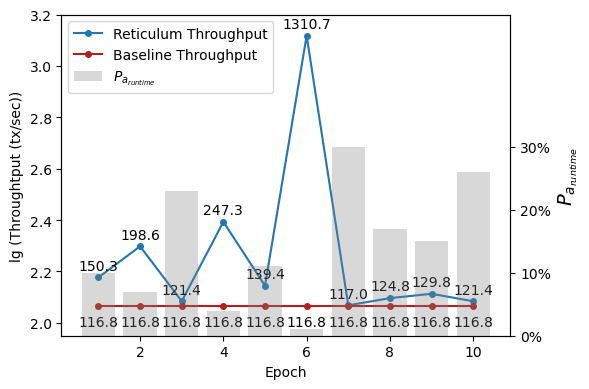

In [1]:
"""
This code is just draw and save the figure of section 5.3

The data plotted here:
    paruntime: the runtime Adversarial nodes in ten epoch (generate randomly)
    epochtime: the time of Reticulum in different epoch
    epochtimebasline: the time of Rapidchain(baseline) in different epoch
    
Note! : We got these data experimentally, we just extracted them directly into the python code, and we made sure that these data are real and reliable. 
        The exact reproduction can be seen in the Reti_code folder.
"""

import random
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(6, 4))

# Set the color of x-axis and y-axis of ax1 to black, and set the color of y-axis of ax2 to black
ax1.tick_params(axis='y', colors='black')
ax1.spines['left'].set_color('black')
ax2 = ax1.twinx()
ax2.tick_params(axis='y', colors='black')

# Data for plotting
paruntime = [10, 7, 23, 4, 11, 1, 30, 17, 15, 26]
epochtime = [436, 330, 540, 265, 470, 50, 560, 525, 505, 540]
epochtimebaseline=561
tempb = []
tempc = []

# Calculate tempb and tempc values
for i in epochtime:
    tempb.append((4096 * 16) / i)
    tempc.append((4096 * 16) / epochtimebaseline)
    
# plot a bar chart on ax2
ax2.bar(range(1,11), paruntime, color='gray', alpha=0.3, label='$P_{a_{runtime}}$')

# plot two line charts on ax1
ax1.plot(range(1,11), np.log10(tempb), label='Reticulum Throughput', marker='o', markersize=4, color="#1F77B3")
ax1.plot(range(1,11), np.log10(tempc), label='Baseline Throughput', marker='o', markersize=4, color="#B31F1F")

# add legends and axis labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles, labels, loc='upper left')
ax2.set_yticks([0,10,20,30])
ax1.set_xlabel('Epoch')
ax2.set_ylabel('$P_{a_{runtime}}$',fontsize=14)
ax1.set_ylabel('lg (Throughtput (tx/sec))')
ax2.set_ylim([0, 51])
ax1.set_ylim([1.95, 3.2])
ax2.set_yticks([0,10,20,30])
ax2.set_yticklabels(['{}%'.format(int(i)) for i in ax2.get_yticks()])

for i, j in enumerate(np.log10(tempb), start=1):
    ax1.annotate(str(round(tempb[i-1], 1)), xy=(i, j), xytext=(i, j+0.03), ha='center')
for i,j in enumerate(np.log10(tempc), start=1):
    ax1.annotate(str(round(tempc[i-1], 1)), xy=(i, j), xytext=(i, j-0.08), ha='center')
fig.subplots_adjust(right=0.88)

# save the figure
plt.savefig('./fig/Throughput.pdf', format='pdf', transparent=True)
plt.tight_layout()

# show the figure
plt.show()

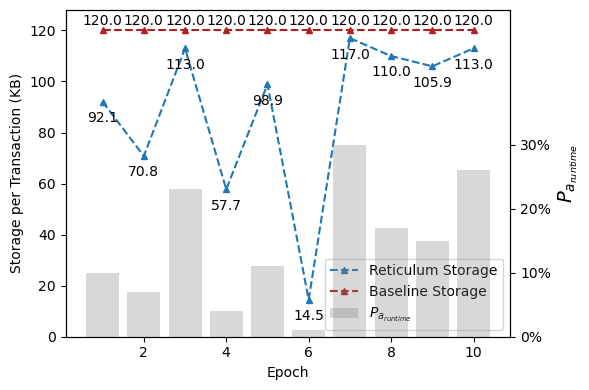

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np

fig, ax1 = plt.subplots(figsize=(6, 4))

# Set the x-axis and y-axis of ax1 to black color, and y-axis of ax2 to blue color
ax1.tick_params(axis='y', colors='black')
ax1.spines['left'].set_color('black')
ax2 = ax1.twinx()
ax2.tick_params(axis='y', colors='black')

# Data for plotting
paruntime=[10,7,23,4,11,1,30,17,15,26]
epochtime=[436,330,540,265,470,50,560,525,505,540]
tempb=[]
tempc=[]

# Calculate tempb and tempc values
for i in epochtime:
    tempb.append(((((i-15)/35)*240*2+(16-((i-15)/35))*2*15)/(16*4096))*1024)
    tempc.append(((2*16*240)/(4096*16))*1024)
    
# plot a bar chart on ax2
ax2.bar(range(1,11), paruntime, color='gray', alpha=0.3, label='$P_{a_{runtime}}$')

# plot two line charts on ax1
ax1.plot(range(1,11), tempb, label='Reticulum Storage', linestyle='--', marker='^', markersize=4, color="#1F77B3")
ax1.plot(range(1,11), tempc, label='Baseline Storage', linestyle='--', marker='^', markersize=4, color="#B31F1F")

# add legends and axis labels
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles = handles1 + handles2
labels = labels1 + labels2
ax1.legend(handles, labels, loc='lower right')

ax1.set_xlabel('Epoch')
ax2.set_ylabel('$P_{a_{runtime}}$',fontsize=14)
ax1.set_ylabel('Storage per Transaction (KB)')
ax2.set_ylim([0, 51])
ax1.set_ylim([0, 128])
ax2.set_yticks([0,10,20,30])
ax2.set_yticklabels(['{}%'.format(int(i)) for i in ax2.get_yticks()])
for i, j in enumerate(tempb, start=1):
    ax1.annotate(str(round(tempb[i-1], 1)), xy=(i, j), xytext=(i, j-8), ha='center')
for i,j in enumerate(tempc, start=1):
    ax1.annotate(str(round(tempc[i-1], 1)), xy=(i, j), xytext=(i, j+2), ha='center')
fig.subplots_adjust(right=0.88)
plt.savefig('./fig/Storage.pdf', format='pdf', transparent=True)

plt.tight_layout()

# show the figure
plt.show()

## Simulations

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Set the number of nodes, number of groups, group size, and number of trials
num_nodes = 240
num_groups = 16
group_size = 15
num_trials = 2000

results = []
time_results=[]
baseline=[]

# Loop through different percentages of Byzantine nodes
for n in range(31):
    successes = 0
     # Run the trials
    for _ in range(num_trials):
        # Create a list of nodes with some percentage of Byzantine nodes
        num_byzantine = int(num_nodes * n / 100)
        nodes = [True] * (num_nodes - num_byzantine) + [False] * num_byzantine
        random.shuffle(nodes)

        # Divide the nodes into groups
        groups = [nodes[i:i+group_size] for i in range(0, num_groups * group_size, group_size)]
        # Count the number of groups that have no Byzantine nodes
        num_successful_groups = sum(all(group) for group in groups)
        successes += num_successful_groups
        
    # Calculate the average number of successful groups for this percentage of Byzantine nodes
    avg_successes = successes / num_trials
    
    # Add the result to the list of results
    results.append((n, avg_successes))

for n, avg_successes in results:
    print(f"Percentage of Byzantine nodes: {n}%\tAverage successful groups: {avg_successes}")
    # T1=15 lambda=35
    # Calculate the time per transaction for this percentage of Byzantine nodes
    time_results.append((4096*16)/((16-avg_successes)*(35)+15))
    baseline.append((4096*16)/(16*35+15))
    
storage=[]
storage_base=[]
for n, avg_successes in results:
    # Calculate the storgae per transaction for this percentage of Byzantine nodes
    storage.append(((2*15*avg_successes+2*240*(16-avg_successes))/(4096*16))*1024)
    storage_base.append((2*240*16/(4096*16))*1024)



Percentage of Byzantine nodes: 0%	Average successful groups: 16.0
Percentage of Byzantine nodes: 1%	Average successful groups: 14.0705
Percentage of Byzantine nodes: 2%	Average successful groups: 12.336
Percentage of Byzantine nodes: 3%	Average successful groups: 10.1115
Percentage of Byzantine nodes: 4%	Average successful groups: 8.847
Percentage of Byzantine nodes: 5%	Average successful groups: 7.254
Percentage of Byzantine nodes: 6%	Average successful groups: 6.323
Percentage of Byzantine nodes: 7%	Average successful groups: 5.4485
Percentage of Byzantine nodes: 8%	Average successful groups: 4.4475
Percentage of Byzantine nodes: 9%	Average successful groups: 3.8765
Percentage of Byzantine nodes: 10%	Average successful groups: 3.0985
Percentage of Byzantine nodes: 11%	Average successful groups: 2.691
Percentage of Byzantine nodes: 12%	Average successful groups: 2.3335
Percentage of Byzantine nodes: 13%	Average successful groups: 1.868
Percentage of Byzantine nodes: 14%	Average succes

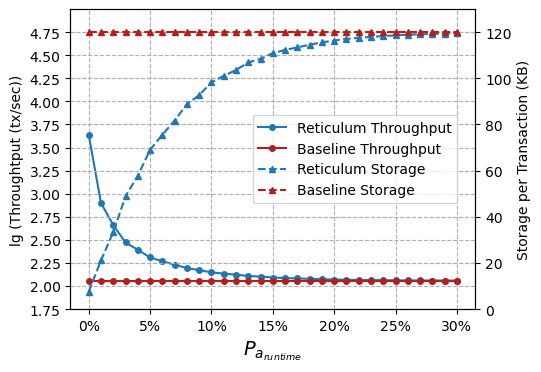

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the logarithm of time_results and baseline
logA = np.log10(time_results)
logB = np.log10(baseline)

# Create a figure
fig = plt.figure(figsize=(6, 4))
plt.subplots_adjust(right=0.8)

# Plot the Reticulum Throughput and RapidChain Throughput
plt.plot(range(31), logA, label='Reticulum Throughput', marker='o', markersize=4, color='#1F77B3')
plt.plot(range(31), logB, label='Baseline Throughput', marker='o', markersize=4, color='#B31F1F')

# Set labels and grid
plt.xlabel('$P_{a_{runtime}}$', fontsize=14) 
plt.ylabel('lg (Throughtput (tx/sec))')
plt.grid(linestyle='--')

# Set y-axis ticks and x-axis tick labels
plt.yticks(np.arange(1.75, 5, 0.25))
plt.xticks(plt.xticks()[0], ['{}%'.format(int(i)) for i in plt.xticks()[0]])

# Set y-axis limits
plt.ylim(1.75, 5)

# Create a twin y-axis for Storage per Transaction
plt.twinx() 
plt.plot(range(31), storage, label='Reticulum Storage', linestyle='--', marker='^', markersize=4, color="#1F77B3")
plt.plot(range(31), storage_base, label='Baseline Storage', linestyle='--', marker='^', markersize=4, color="#B31F1F")
plt.ylabel('Storage per Transaction (KB)')

# Set y-axis limits for Storage per Transaction
plt.ylim(0, 130)

# Add legends
handles, labels = [], []
for ax in plt.gcf().axes:
    axLine, axLabel = ax.get_legend_handles_labels()
    handles += axLine
    labels += axLabel
plt.subplots_adjust(right=0.8)
plt.legend(handles, labels, bbox_to_anchor=(0.45, 0.5), loc='center left', borderaxespad=0.)
fig.subplots_adjust(bottom=0.13)

# Add grid lines
plt.grid(linestyle='--')

# Save the figure as a PDF file
plt.savefig('./fig/Rapidchain.pdf', format='pdf', transparent=True)

# Show the plot
plt.show()
